In [3]:
#importing the files
from core import *
from my_io import *
from util import *
from exceptions import *
import os

#### Function to Segment Audio files 
This Program is created to read and segment recorded audio files into events based on a starting and ending point within which an event is detected by creating AudioRegion objects based on the 'Auditok' signal processing program. The split_audio function takes a single audio file in 'wav' or 'raw' formats at a time and splits it into smaller segments containing event activity. Event detection is enabled through enegry thresholding (default energy threshold is 55). By default the audio segments would be between 0.2 to 4 seconds long and would be saved into the output directory specified. This enables large audio files to be segregated into seperate audio files with events for training or testing the model.

In [4]:
# Function to split a single audio file
def split_audio(input_file, output_dir, min_dur=0.2, max_dur=4, max_silence=0.3, energy_threshold=55):
    audio_regions = split(
        input_file,
        min_dur=min_dur,
        max_dur=max_dur,
        max_silence=max_silence,
        energy_threshold=energy_threshold
    )

    for i, r in enumerate(audio_regions):
        # Regions returned by `split` have 'start' and 'end' metadata fields
        print(f"Region {i}: {r.meta.start:.3f}s -- {r.meta.end:.3f}s")

        # You can save the region here if needed
        # Specify the full path to save the region in the output directory
        filename = os.path.join(output_dir, f"region_{r.meta.start:.3f}-{r.meta.end:.3f}.wav")
        r.save(filename)
        print(f"Region saved as: {filename}")

def main():
    # Directory containing your audio files
    folder_path = r"C:\Users\User\Desktop\classes"
    # Output directory for storing the segmented files
    output_dir =  r"C:\Users\User\Desktop\Output"
    # Loop through all audio files in the folder
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            split_audio(file_path, output_dir)

if __name__ == "__main__":
    main()

Region 0: 0.000s -- 4.151s
Region saved as: C:\Users\User\Desktop\Output\region_0.000-4.151.wav


#### Audio Segment Analysis
The section below is created for the purpose of tuning analysing the segmented audio clips to tune the thresholding and other factors to enhance the quality and efficiency of the segmentation program. The split_and_plot() function would split the audio file as it did in the segmentation function above and would plot the regions in the audio file that has been segmented. Note that only one file can be analysed at a time.

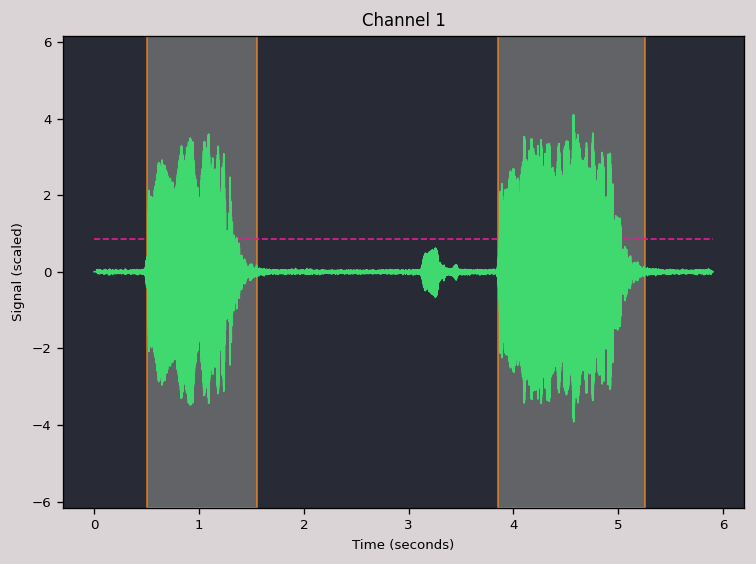

In [5]:
region = load(r"C:\Users\User\Downloads\owl.wav") # returns an AudioRegion object
regions = region.split_and_plot(min_dur=0.2, max_dur=4, max_silence=0.3, energy_threshold=55)

In [19]:
# Play the saved audio segments
for i, r in enumerate(regions):
    r.play(progress_bar=True)